Introduction:
===============================
A legacy financial institution, headquartered in Hyderabad, is planning to introduce a new line of credit cards to expand its product offerings and market presence. They were approached by a data services company with a proposal to assist in this project. However, the bank's strategy director remains cautious and has requested a pilot project using a sample dataset of 4,000 customers across five cities.

The goal of the pilot is to analyze the provided customer data, focusing on online spending habits and other relevant details, to tailor the credit card offering to meet customer needs and align with market trends. A data analyst from the data services company has been tasked with this analysis, and the success of the full project depends on delivering actionable, data-driven insights that will guide the bank's strategy and earn the approval of the leadership team.

Datasets:
==========================================
Here's a summary of the dataset structure:

1. dim_customers (Customer Information):
------------------------------------------  
customer_id: Unique identifier for each customer.
gender: Gender of the customer (Male, Female).
age_group: The age range of the customer (21-24, 25-34, 35-45, 45+).
marital_status: The marital status of the customer (single, married).
city: The city where the customer resides (Mumbai, Delhi-NCR, Chennai, Hyderabad, Bengaluru).
occupation: Profession of the customer (Salaried IT Employees, Salaried Other Employees, Business Owners, Freelancers, Government Employees).
average_income: Monthly average income of the customer in Indian Rupees (INR).

2. fact_spends (Spending Information):
-------------------------------------------
customer_id: Unique identifier linking to the corresponding customer in the dim_customers table.
month: The month during which the spending occurred (May, June, July, August, September, October).
category: The category of spending (Entertainment, Apparel, Electronics, etc.).
payment_type: The type of payment method used (Debit Card, Credit Card, UPI, Net Banking).
spends: The total amount spent by the customer for a given month, category, and payment method.

Questions to be evaluated:
========================================
1 Demographic Classification: How are customers classified based on available demographic attributes such as age group, gender, occupation, and marital status?

2 Average Income Utilization %: What is the average income utilization percentage of customers (calculated as avg_spends/avg_income), and how does this relate to their likelihood of using credit cards?

3 Spending Insights: Where do customers spend the most money? How does spending behavior vary based on occupation, gender, city, and age group?

4 Key Customer Segments: What are the key customer segments likely to be the highest-value users of the new credit cards based on demographic classification and spending insights?

5 Credit Card Feature Recommendations: What credit card features should be included to increase the likelihood of usage, based on insights from the data and additional secondary research?

In [5]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_customer = pd.read_csv(r"C:\Users\Ankita\Documents\dim_customers.csv")
df_customer

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376
...,...,...,...,...,...,...,...
3995,ATQCUS3035,45+,Delhi NCR,Business Owners,Female,Married,72805
3996,ATQCUS2585,35-45,Mumbai,Salaried Other Employees,Female,Married,41343
3997,ATQCUS1229,35-45,Bengaluru,Salaried IT Employees,Male,Married,65948
3998,ATQCUS0581,25-34,Bengaluru,Government Employees,Male,Married,52589


In [9]:
df_spend= pd.read_csv(r"C:\Users\Ankita\Documents\fact_spends.csv")
df_spend

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102
...,...,...,...,...,...
863995,ATQCUS1993,June,Bills,Debit Card,897
863996,ATQCUS1063,September,Bills,Credit Card,2680
863997,ATQCUS0416,August,Others,Credit Card,270
863998,ATQCUS3361,September,Bills,UPI,446


In [13]:
merged_df = pd.merge(df_customer, df_spend, on= "customer_id", how= "inner")

In [23]:
#let us understand the dataset

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [25]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [33]:
missing_value = (df_customer.isnull().sum()/ len(df_customer)*100)
missing_value 

customer_id       0.0
age_group         0.0
city              0.0
occupation        0.0
gender            0.0
marital status    0.0
avg_income        0.0
dtype: float64

In [36]:
missing_value = (df_spend.isnull().sum()/ len(df_spend)*100)
missing_value 

customer_id     0.0
month           0.0
category        0.0
payment_type    0.0
spend           0.0
dtype: float64

Since there are no missing values in the dataset, there is no need for further action regarding null value handling.

In [38]:
#Let us understand the age distribution 
age_distribution = df_customer["age_group"].value_counts()
age_distribution 

age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: count, dtype: int64

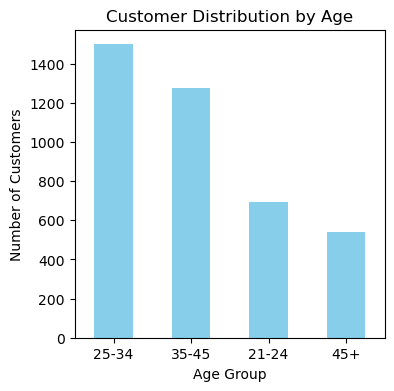

In [49]:
#let us plot it in a graph
plt.figure(figsize=(4, 4))
age_distribution.plot(kind="bar", color="skyblue")  
plt.title("Customer Distribution by Age")  
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)  
plt.show()


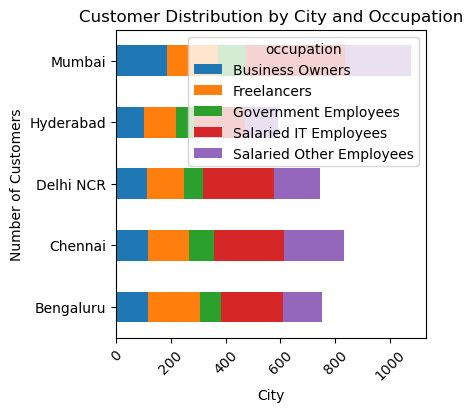

In [73]:
#Let us understand the customer distribution by city and occupation:

city_occupation_dist = df_customer.groupby(['city', 'occupation']).size().unstack()
plt.figure(figsize=(4, 4))
city_occupation_dist.plot(kind="barh", stacked=True, ax=plt.gca())  
plt.title("Customer Distribution by City and Occupation") 
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [76]:
#Customer distribution by Occupation 

occupation_dist = df_customer["occupation"].value_counts()
occupation_dist 

occupation
Salaried IT Employees       1294
Salaried Other Employees     893
Freelancers                  784
Business Owners              630
Government Employees         399
Name: count, dtype: int64

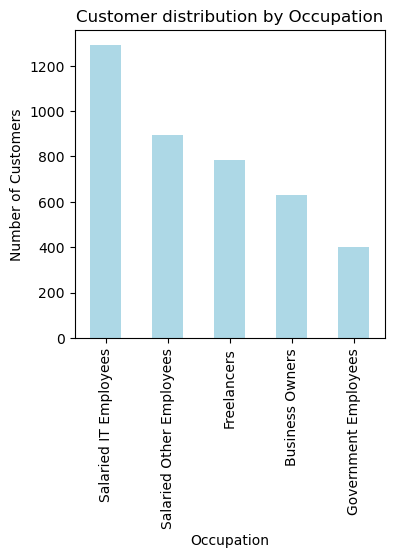

In [99]:
plt.figure(figsize=(4,4))
occupation_dist.plot(kind= "bar", color = "lightblue") 
plt.title("Customer distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of Customers")
plt.show()

In [129]:
#Average Monthly Income and Monthly spend by Gender:

avg_spend_income = merged_df.groupby("gender").agg({'spend': 'mean', 'avg_income':'mean'}).reset_index()
avg_spend_income.set_index("gender", inplace= True)
avg_spend_income

,spend,avg_income
gender,,
Female,573.373584,51700.726301
Male,636.664166,51633.427031


<Figure size 400x400 with 0 Axes>

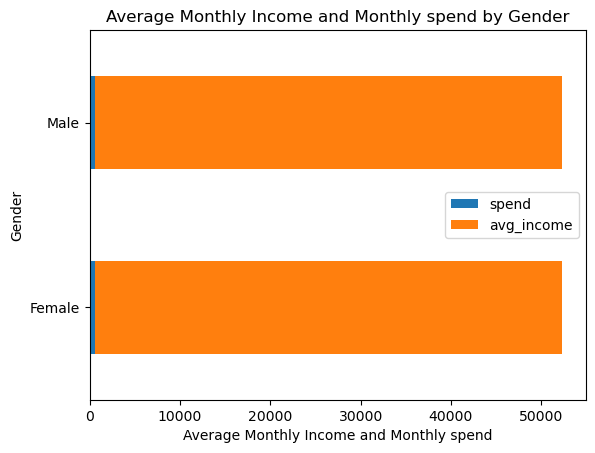

In [142]:
plt.figure(figsize=(4,4))
avg_spend_income.plot(kind= "barh", stacked= True)
plt.title("Average Monthly Income and Monthly spend by Gender")
plt.xlabel("Average Monthly Income and Monthly spend")
plt.ylabel("Gender")
plt.show()

In [126]:
df_spend 

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102
...,...,...,...,...,...
863995,ATQCUS1993,June,Bills,Debit Card,897
863996,ATQCUS1063,September,Bills,Credit Card,2680
863997,ATQCUS0416,August,Others,Credit Card,270
863998,ATQCUS3361,September,Bills,UPI,446


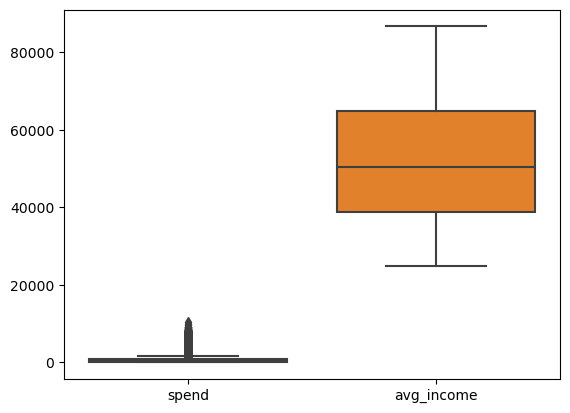

In [140]:
import seaborn as sns

sns.boxplot(data=merged_df[['spend', 'avg_income']])
plt.show()


In [33]:
merged_df["utilization_percentage"] = (merged_df["spend"] / merged_df["avg_income"]) * 100
avg_uti = merged_df.groupby(["gender", "age_group", "occupation"]).agg(
    avg_income=("avg_income", "mean"),
    avg_utilization_percentage=("utilization_percentage", "mean")
).reset_index()
avg_uti

,gender,age_group,occupation,avg_income,avg_utilization_percentage
0,Female,21-24,Business Owners,53677.588235,0.775391
1,Female,21-24,Freelancers,27109.142857,1.054408
2,Female,21-24,Government Employees,40334.333333,0.662045
3,Female,21-24,Salaried IT Employees,48314.008000,1.217262
4,Female,21-24,Salaried Other Employees,30467.444444,0.976054
5,Female,25-34,Business Owners,68301.104167,0.843584
6,Female,25-34,Freelancers,35076.849315,1.163411
7,Female,25-34,Government Employees,52273.750000,0.748285
8,Female,25-34,Salaried IT Employees,62175.192118,1.326042
9,Female,25-34,Salaried Other Employees,38943.818182,1.090379


In [176]:
#Group by occupation and payment mode to calculate average utilization percentage
utilization_summary = merged_df.groupby(["occupation", "payment_type"]).agg(
    avg_utilization_percentage=("utilization_percentage", "mean")
).reset_index()

utilization_summary


,occupation,payment_type,avg_utilization_percentage
0,Business Owners,Credit Card,1.509925
1,Business Owners,Debit Card,0.816145
2,Business Owners,Net Banking,0.413160
3,Business Owners,UPI,0.954112
4,Freelancers,Credit Card,1.745015
5,Freelancers,Debit Card,1.158854
6,Freelancers,Net Banking,0.511855
7,Freelancers,UPI,1.667299
8,Government Employees,Credit Card,1.397984
9,Government Employees,Debit Card,0.797163


In [181]:
#Total spend by Payment Type
total_payement = merged_df.groupby("payment_type")["spend"].sum()
total_payement

payment_type
Credit Card    216308873
Debit Card     119557229
Net Banking     54208430
UPI            140823223
Name: spend, dtype: int64

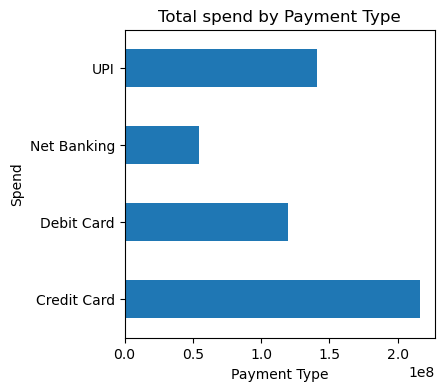

In [188]:
plt.figure(figsize= (4,4))
total_payement.plot(kind="barh", stacked = True)
plt.title("Total spend by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Spend")
plt.show()

In [192]:
total_customers_by_city = merged_df.groupby("city").size().reset_index(name = "Total_customers")
credit_card_by_city= merged_df[merged_df["payment_type"]=="Credit Card"].groupby("city").size().reset_index(name= "Total_CreditCard_users")
city_credit_card_data = pd.merge(total_customers_by_city, credit_card_by_city, on="city", how="left").fillna(0)  
city_credit_card_data["credit_card%"] = (city_credit_card_data["Total_CreditCard_users"]/city_credit_card_data["Total_customers"])*100
city_credit_card_data

,city,Total_customers,Total_CreditCard_users,credit_card%
0,Bengaluru,162216,40554,25.0
1,Chennai,180144,45036,25.0
2,Delhi NCR,160704,40176,25.0
3,Hyderabad,128088,32022,25.0
4,Mumbai,232848,58212,25.0


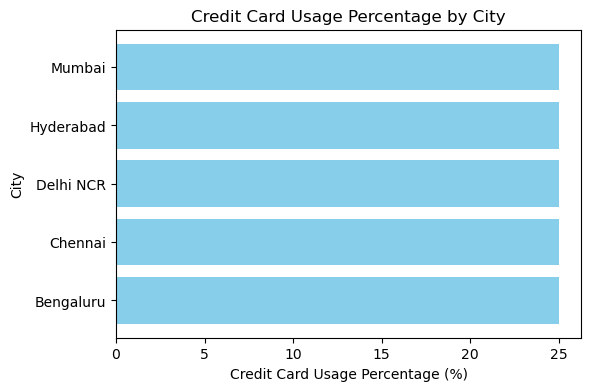

In [201]:
plt.figure(figsize=(6, 4))
plt.barh(city_credit_card_data['city'], city_credit_card_data['credit_card%'], color='skyblue')
plt.title("Credit Card Usage Percentage by City")
plt.xlabel("Credit Card Usage Percentage (%)")
plt.ylabel("City")

plt.show()


In [ ]:
#Average monthly Salary and Monthly spend by age group

In [17]:
average_monthly_salary_spend = merged_df.groupby("age_group").agg(average_monthly_salary= ("avg_income","mean"),average_monthly_spend= ("spend","mean")).reset_index()
average_monthly_salary_spend 

,age_group,average_monthly_salary,average_monthly_spend
0,21-24,40718.272069,459.097638
1,25-34,51827.084112,628.483608
2,35-45,53425.954438,693.316415
3,45+,61047.566914,588.407562


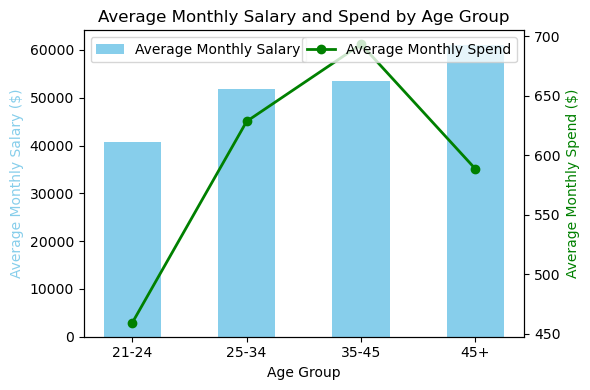

In [29]:
import matplotlib.pyplot as plt

# Step 2: Plotting the bar-line chart
fig, ax1 = plt.subplots(figsize=(6, 4))

# Bar chart for average monthly salary
ax1.bar(average_monthly_salary_spend['age_group'], 
        average_monthly_salary_spend['average_monthly_salary'], 
        color='skyblue', width=0.5, label='Average Monthly Salary')

# Create a second y-axis to plot the line chart for average monthly spend
ax2 = ax1.twinx()

# Line chart for average monthly spend
ax2.plot(average_monthly_salary_spend['age_group'], 
         average_monthly_salary_spend['average_monthly_spend'], 
         color='green', marker='o', label='Average Monthly Spend', linewidth=2)

# Add labels and title
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Monthly Salary ($)', color='skyblue')
ax2.set_ylabel('Average Monthly Spend ($)', color='green')
plt.title('Average Monthly Salary and Spend by Age Group')

# Display legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 300x300 with 0 Axes>

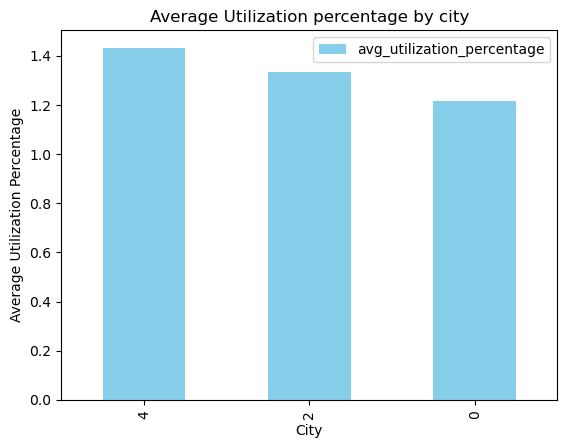

In [41]:
plt.figure(figsize=(4,4))
top_3.plot(kind= "bar", color= "skyblue")
plt.title("Average Utilization percentage by city")
plt.xlabel("City")
plt.ylabel("Average Utilization Percentage")
plt.show()

In [51]:
spend_by_category = merged_df.groupby(["category", "payment_type"])["spend"].sum().reset_index()
top_5_category =spend_by_category.sort_values(by = "spend", ascending= False).head(5)
top_5_category

,category,payment_type,spend
4,Bills,Credit Card,46332586
8,Electronics,Credit Card,35183765
23,Groceries,UPI,28596694
24,Health & Wellness,Credit Card,27676505
20,Groceries,Credit Card,27166419


<Figure size 600x400 with 0 Axes>

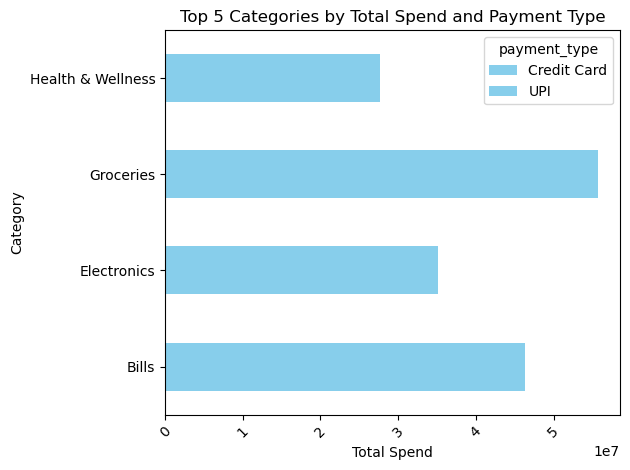

In [60]:
spend_by_category = merged_df.groupby(["category", "payment_type"])["spend"].sum().reset_index()
top_5_category = spend_by_category.sort_values(by="spend", ascending=False).head(5)
Top5 = top_5_category.pivot(index="category", columns="payment_type", values="spend")
plt.figure(figsize=(6, 4))
Top5.plot(kind="barh", stacked=True, color="skyblue")
plt.title("Top 5 Categories by Total Spend and Payment Type")
plt.xlabel("Total Spend")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [64]:
avg_spend_util_by_occupation = merged_df.groupby("occupation").agg(
    average_monthly_spend=("spend", "mean"),
    avg_utilization_percentage=("utilization_percentage", "mean")
).reset_index()
avg_spend_util_by_occupation

,occupation,average_monthly_spend,avg_utilization_percentage
0,Business Owners,646.713029,0.923335
1,Freelancers,446.066220,1.270756
2,Government Employees,419.131370,0.804519
3,Salaried IT Employees,871.974297,1.414624
4,Salaried Other Employees,453.691707,1.167415


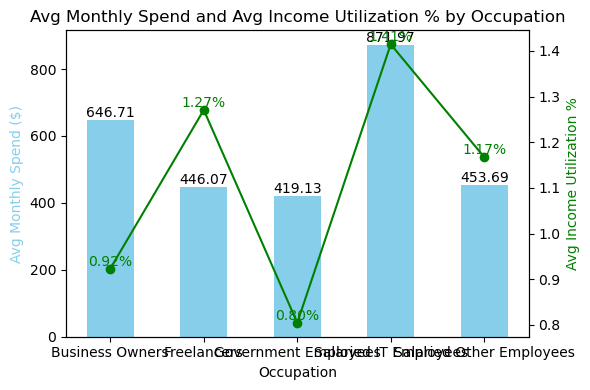

In [68]:
fig, ax1 = plt.subplots(figsize=(6, 4))
bars = ax1.bar(avg_spend_util_by_occupation['occupation'], 
               avg_spend_util_by_occupation['average_monthly_spend'], 
               color='skyblue', width=0.5, label='Avg Monthly Spend')
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')
ax2 = ax1.twinx()
ax2.plot(avg_spend_util_by_occupation['occupation'], 
         avg_spend_util_by_occupation['avg_utilization_percentage'], 
         color='green', marker='o', label='Avg Utilization %')
for i, value in enumerate(avg_spend_util_by_occupation['avg_utilization_percentage']):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='green')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Avg Monthly Spend ($)', color='skyblue')
ax2.set_ylabel('Avg Income Utilization %', color='green')
plt.title('Avg Monthly Spend and Avg Income Utilization % by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
total_income = merged_df["avg_income"].sum()
total_income

44631675864

In [72]:
total_revenue = merged_df["spend"].sum()
total_revenue

530897755

In [74]:
average_income_utilization = (merged_df["spend"].sum() / merged_df["avg_income"].sum()) * 100
average_income_utilization

1.1895088963670828

In [76]:
total_amount_spent = merged_df["spend"].sum()
total_amount_spent

530897755

In [78]:
total_average_spend = merged_df["spend"].mean()
total_average_spend

614.464994212963

conclusion:
=================================
Total Income and Revenue:

The dataset reveals a total income of 44631675864X and a total revenue of530897755Y, indicating a healthy flow of customer spending.
Income Utilization:

The average income utilization stands at1.1895088963670828Z%, suggesting that customers use a significant portion of their income for spending, highlighting potential for credit card usage.
Demographic Insights:

Occupation and age group significantly impact spending habits, suggesting tailored credit card features could cater to specific demographics.
Gender and city analysis reveal differences in spending preferences, guiding targeted promotions.
Spending by Category:

Insights into the top spending categories and payment types can inform the design of rewards programs and tailored credit card benefits.
Recommendations:
Reward Programs: Implement cashback and rewards based on high-spending categories.
Targeted Offers: Provide customized credit limits and benefits based on occupation and income utilization.
Location-based Promotions: Develop offers tailored to customers in high-spending cities.
Overall, the analysis highlights key customer segments and spending behaviors, offering opportunities for strategic credit card feature enhancements.